Using https://www.kaggle.com/cyannani123/keras-cellular-image-classification as test example

In [1]:
import os
import sys
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sys.path.append('../scripts')
from data_new import ImgGen
import matplotlib.pyplot as plt

Loading test and train data.

Will load directly from zip for now.

In [2]:
train_data = pd.read_csv("../input/recbio/train.csv").head(2)
train_data.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,sirna_250
1,HEPG2-01_1_B04,HEPG2-01,1,B04,sirna_62


In [3]:
sirna_label_encoder = LabelEncoder().fit(train_data.sirna)

Saidid on samast wellist tehtud eri pildid. Pm võib võtta ainult ühe saidi sisse.
Channelid on eri kanalitega tehtud pildid. Neid on kokku 6.

Kirjutan piltide laadimise klassi notebooki näitel

In [4]:
#train_data = train_data.sample(frac=0.01).reset_index(drop=True)

In [5]:
len(train_data)


2

In [6]:
train = ImgGen(train_data, label_encoder=sirna_label_encoder, path='../input/recbio')

In [7]:
len(train)

2021-04-28 19:08:03,888 Batch size 32
2021-04-28 19:08:03,889 Label data 2
2021-04-28 19:08:03,890 Nr of batches 1.0


1

In [8]:
%%timeit -n3 -r3
first_batch=train[0]

2021-04-28 19:08:03,925 Taking batches
2021-04-28 19:08:03,927   experiment  plate well
0   HEPG2-01      1  B03
1   HEPG2-01      1  B04
2021-04-28 19:08:03,930 0    sirna_250
1     sirna_62
Name: sirna, dtype: object
2021-04-28 19:08:03,931 Starting batch loading
2021-04-28 19:08:03,932 Experiment HEPG2-01, plate 1, well B03
2021-04-28 19:08:03,932 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w1.png
2021-04-28 19:08:04,006 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w2.png
2021-04-28 19:08:04,038 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w3.png
2021-04-28 19:08:04,065 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w4.png
2021-04-28 19:08:04,097 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w5.png
2021-04-28 19:08:04,122 Loading image ../input/recbio/train/HEPG2-01/Plate1/B03_s1_w6.png
2021-04-28 19:08:04,145 Got channels: 6
2021-04-28 19:08:04,145 Starting preprocessing
2021-04-28 19:08:04,146 Preprocessing comple

The slowest run took 472554.49 times longer than the fastest. This could mean that an intermediate result is being cached.
68.3 ms ± 96.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [9]:
first_batch=train[0]

In [10]:
single_array = first_batch[0][0]

In [11]:
single_array.shape

(6, 512, 512)

In [12]:

single_array[0:3].shape

(3, 512, 512)

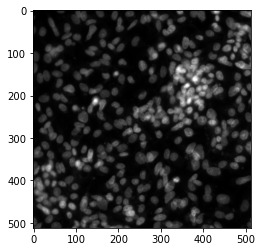

In [13]:
plt.imshow(single_array[0], cmap=plt.get_cmap('gray'))

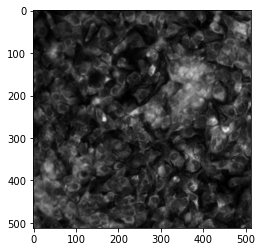

In [14]:
plt.imshow(single_array[1], cmap=plt.get_cmap('gray'))

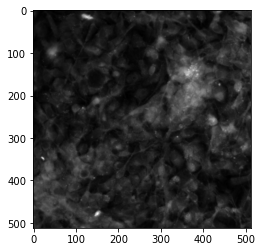

In [15]:
plt.imshow(single_array[2], cmap=plt.get_cmap('gray'))

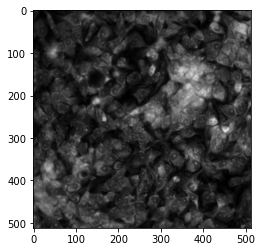

In [16]:
plt.imshow(single_array[3], cmap=plt.get_cmap('gray'))

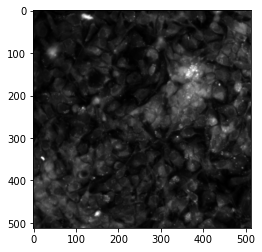

In [17]:
plt.imshow(single_array[4], cmap=plt.get_cmap('gray'))

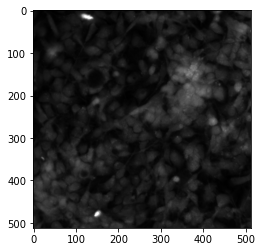

In [18]:
plt.imshow(single_array[5], cmap=plt.get_cmap('gray'))

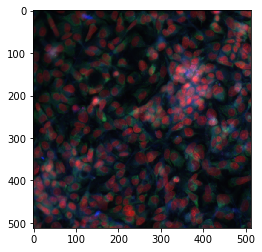

In [19]:
single_image_2 = single_array[0:3].transpose((1,2,0))
plt.imshow(single_image_2, interpolation='nearest')

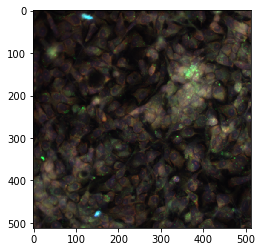

In [20]:
single_image_2 = single_array[3:6].transpose((1,2,0))
plt.imshow(single_image_2, interpolation='nearest')